# Zeitlicher Ablauf der Datenerfassung

Einleitung
 ------
In diesem Notebook geht es darum den zeitlichen Ablauf der Datenerfassung darzustellen.
Dabei werden als zeitliche Kennzahlen die arithmetischen Mittelwerte genutzt sowie die min und maximal Zeitwerte.     
Die Daten werden mit einer Smartphone Android App erfasst (https://github.com/SandGreif/Fahrradwege-Monitoring-App).

In [1]:
import pandas
import os
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

In [46]:
featuresDf = pandas.read_csv("../daten/merkmale_datensatz_26_bis_27/absMesswerte/merkmale.csv")
featuresDf.describe()

,Unnamed: 0,Zeitstempel in Unixzeit,Breitengrad,Laengengrad,Geschwindigkeit in km/h,Anzahl der Messwerte,Start des Zeitfensters in ns seit Start der JVM,Start der Messwerterfassung in ns seit Start der JVM,Start der Belichtung in ns seit Start der JVM,Belichtungszeit in ns,...,Varianz X-Achse Beschleunigung in m/s^2,Varianz Y-Achse Beschleunigung in m/s^2,Varianz Z-Achse Beschleunigung in m/s^2,Varianz Nick in rad,Varianz Roll in rad,Standardabweichung X-Achse Beschleunigung in m/s^2,Standardabweichung Y-Achse Beschleunigung in m/s^2,Standardabweichung Z-Achse Beschleunigung in m/s^2,Standardabweichung Nick in rad,Standardabweichung Roll in rad
count,4963.000000,4.963000e+03,4963.000000,4963.000000,4963.000000,4963.000000,4.963000e+03,4.963000e+03,4.963000e+03,4.963000e+03,...,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000
mean,2481.000000,1.525693e+12,53.583963,10.084546,15.184848,62.252871,1.527235e+13,1.527227e+13,1.527260e+13,9.923256e+06,...,0.855972,7.251478,7.945635,0.069539,0.161104,0.817209,2.170656,2.398502,0.244832,0.298964
std,1432.839023,1.231895e+07,0.016691,0.035909,4.105801,0.448394,9.408304e+12,9.408303e+12,9.408305e+12,9.941265e+06,...,1.098236,12.244620,10.768514,0.049929,0.262608,0.433797,1.593814,1.480967,0.097968,0.267842
min,0.000000,1.525679e+12,53.556515,10.020442,5.004000,60.000000,4.720012e+12,4.719938e+12,4.720260e+12,7.630070e+05,...,0.013490,0.028860,0.030100,0.001940,0.000940,0.116150,0.169880,0.173490,0.044050,0.030660
25%,1240.500000,1.525681e+12,53.571229,10.054037,12.492000,62.000000,6.161229e+12,6.161143e+12,6.161476e+12,2.298216e+06,...,0.263510,1.211805,1.791545,0.027065,0.009520,0.513335,1.100820,1.338485,0.164515,0.097570
50%,2481.000000,1.525682e+12,53.579170,10.094249,15.624002,62.000000,7.806778e+12,7.806702e+12,7.807027e+12,5.331862e+06,...,0.515080,2.880070,3.927960,0.057600,0.031830,0.717690,1.697080,1.981910,0.240000,0.178410
75%,3721.500000,1.525705e+12,53.597912,10.116828,18.108002,63.000000,2.491194e+13,2.491186e+13,2.491218e+13,1.000184e+07,...,1.014400,6.886500,9.547350,0.104750,0.199940,1.007175,2.624210,3.089880,0.323655,0.447150
max,4962.000000,1.525707e+12,53.613850,10.137879,24.948000,67.000000,2.659563e+13,2.659555e+13,2.659587e+13,2.999632e+07,...,18.796390,109.496300,104.803140,0.232420,1.586570,4.335480,10.464050,10.237340,0.482100,1.259590


In [47]:
featuresDf.columns

Index(['Unnamed: 0', 'Zeitstempel in Unixzeit', 'Breitengrad', 'Laengengrad',
       'Geschwindigkeit in km/h', 'X-Achse Beschleunigungswerte in m/s^2',
       'Y-Achse Beschleunigungswerte in m/s^2',
       'Z-Achse Beschleunigungswerte in m/s^2', 'Gier Messwerte in rad',
       'Nick Messwerte in rad', 'Roll Messwerte in rad',
       'Zeitstempel der Messwerte in ns', 'Anzahl der Messwerte',
       'Start des Zeitfensters in ns seit Start der JVM',
       'Start der Messwerterfassung in ns seit Start der JVM',
       'Start der Belichtung in ns seit Start der JVM',
       'Belichtungszeit in ns',
       'Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM',
       'Stopp der Messwerterfassung in Unixzeit',
       'Mittelwert X-Achse Beschleunigung in m/s^2',
       'Mittelwert Y-Achse Beschleunigung in m/s^2',
       'Mittelwert Z-Achse Beschleunigung in m/s^2', 'Mittelwert Nick in rad',
       'Mittelwert Roll in rad', 'Gier-Aenderung in rad',
       'Varianz X-Achse 

In [76]:
# Mittelwert der Belichtungszeit aller Aufnahmen umgerechnet in ms
meanExposureTime = featuresDf['Belichtungszeit in ns'].mean() / 1000000
meanExposureTime

9.9232557128752763

In [77]:
# Mittelwert Anzahl der Messwerte pro Merkmal
featuresDf['Anzahl der Messwerte'].mean()

62.2528712472295

In [78]:
# Dauer des Zeitfensters in ms
timeframe = 500

In [79]:
# Mittelwert vom Stop der Datenerfassung in ms bis zum Ende des Zeitfensters in ms
meanStopMeasurementToEndTimeframeTime =(featuresDf['Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM'] 
                          - (featuresDf['Start des Zeitfensters in ns seit Start der JVM'] + (timeframe * 1000000))).mean()
meanStopMeasurementToEndTimeframeTime = meanStopMeasurementToEndTimeframeTime / 1000000
meanStopMeasurementToEndTimeframeTime

230.83999449949627

In [67]:
# Mittelwert vom Aufruf das die Aufnahme fertig ist bis zum Stopp der Messwerterfassung in ms
meanStopMeasurementTime = (featuresDf['Stopp der Messwerterfassung in Unixzeit'] - featuresDf['Zeitstempel in Unixzeit']).mean()
meanStopMeasurementTime

368.37013902881324

In [80]:
# Mittelwert vom Start der Messwert Datenerfassung bis zum Start des Zeitfensters in ms
meanStartMeasurementDataTime = featuresDf['Start des Zeitfensters in ns seit Start der JVM'].mean() - featuresDf['Start der Messwerterfassung in ns seit Start der JVM'].mean()
meanStartMeasurementDataTime = meanStartMeasurementDataTime / 1000000
meanStartMeasurementDataTime

82.22941366210938

Bei der Berechnung des zeitlichen Abstandes von erfassten Bildaufnahmen ist zu beachten, dass die verwendete Daten aus einer Datenerfassungsserie stammen also einem Datensatz.      
Als Kennwert wird nämlich die Zeitstempel Spalte aus der Merkmal CSV Datei genutzt. Der Zeitstempel gibt an, wann das Bild aufgenommen wurde in Unixzeit. Zwischen zwei erfassten    
Datensätzen ist meistens einige Zeit mehr vergangen. Deshalb wird für die Berechnung ein Datensatz genutzt. Der angegebene Zeitwert wird in dem Notebook frameRate berechnet in dem Ordner datenanalyse. 

In [81]:
# Mittelwert des Abstandes bis das nächste Bild aufgenommen wurde von den Datensatz 15 mit 305.906 ms aufgerundet auf 306 Ms.
# Hierbei ist zu beachten 
meanCaptureImagesTime = 1000

In [82]:
# In dieser Zelle werden die Vielfachen der Mittelwerte in Listen angehängt, um exemplarisch
# den weiteren Verlauf einer Datenserie mit gemittelten Zeitwerten in einem Diagram darzustellen.

# Anzahl der Bilder
numberImages = 2
imageCounter = 1
meanExposureOffset = (timeframe - meanExposureTime) / 2
# Listen die mit den entsprechenden Vielfachen der Zeitangaben gefüllt werden

# Gibt mittlere Zeitwerte an zu welchem ein Bild bereit ist zum abspeichern 
meanCaptureImagesTimeList = []
# Start der Zeitfenster 
startTimeFrameList = []
startExposureTimeList = []
exposureTimeList = []
while imageCounter <= numberImages:
    meanCaptureImagesTimeList.append(meanCaptureImagesTime * imageCounter)
    startTimeFrameList.append(meanCaptureImagesTimeList[imageCounter-1] - meanStopMeasurementToEndTimeframeTime - meanStopMeasurementTime - timeframe)
    startExposureTimeList.append(startTimeFrameList[imageCounter-1] + meanExposureOffset)
    exposureTimeList.append(startExposureTimeList[imageCounter-1] + meanExposureTime)
    imageCounter = imageCounter + 1
    

In [83]:
# Offset damit t bei 0 ms beginnt
zeroOffset = startTimeFrameList[0]-meanStartMeasurementDataTime
zeroOffset

-181.43954719041886

In [84]:
measuredDataPerMs = timeframe / featuresDf['Anzahl der Messwerte'].mean()
print(measuredDataPerMs)

8.03175805361


In [85]:
 (meanCaptureImagesTimeList[0] + meanStopMeasurementTime - zeroOffset) / measuredDataPerMs

192.96020570783003

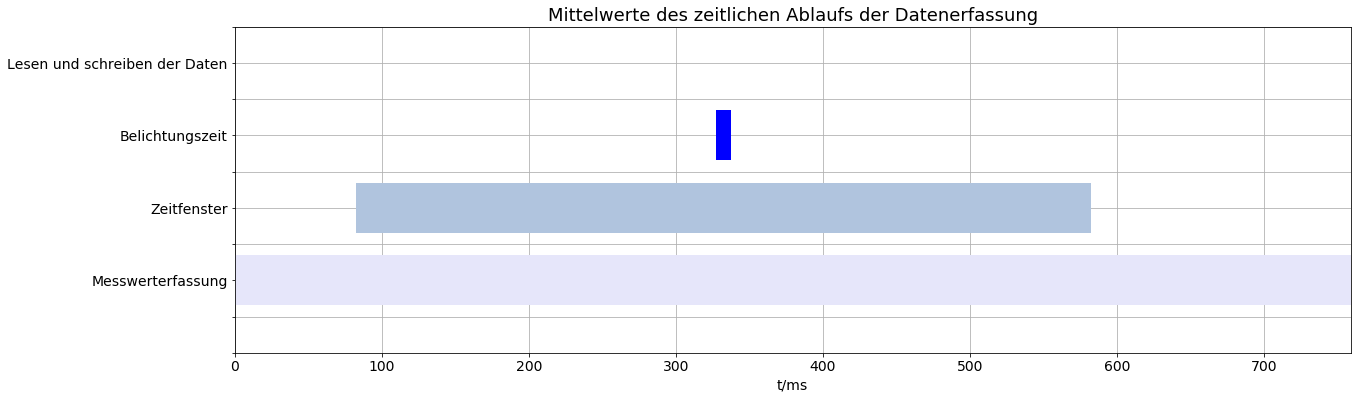

In [86]:
# Plot mit Gantt-Diagram
fig, ax = plt.subplots(figsize=(20,6))
i = 0
while i < numberImages:
    if i == 0:
        ax.hlines(xmin=startTimeFrameList[i]-meanStartMeasurementDataTime - zeroOffset,
                  xmax=meanCaptureImagesTimeList[i] + meanStopMeasurementTime - zeroOffset,y=1, colors="lavender", lw=50)
        ax.hlines(xmin=startTimeFrameList[i] - zeroOffset,xmax=startTimeFrameList[i]+timeframe - zeroOffset,y=2, colors="lightsteelblue", lw=50)
        ax.hlines(xmin=startExposureTimeList[i] - zeroOffset,xmax=exposureTimeList[i] - zeroOffset,y=3, colors="blue", lw=50)
        ax.hlines(xmin=meanCaptureImagesTimeList[i] - zeroOffset,xmax=meanCaptureImagesTimeList[i] + meanStopMeasurementTime + 10- zeroOffset,
                  y=4, colors="dimgrey", lw=50)
    else:
        ax.hlines(xmin=startTimeFrameList[i]-meanStartMeasurementDataTime - zeroOffset,xmax=meanCaptureImagesTimeList[i] + meanStopMeasurementTime - zeroOffset,
                  y=1, colors="lavender", lw=50)

    i = i + 1

def formatter(y, pos):
    if y == 1:
        return 'Messwerterfassung'
    if y == 2:
        return 'Zeitfenster'
    if y == 3:
        return 'Belichtungszeit'
    if y == 4:
        return 'Lesen und schreiben der Daten'
    else:
        return ''

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatter))
plt.xlabel('t/ms',fontsize=14)
plt.title('Mittelwerte des zeitlichen Ablaufs der Datenerfassung',fontsize=18)
plt.grid()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlim(0,startTimeFrameList[1]-meanStartMeasurementDataTime - 60)
plt.ylim(0,4.5)
plt.rcParams["legend.fontsize"] = 14

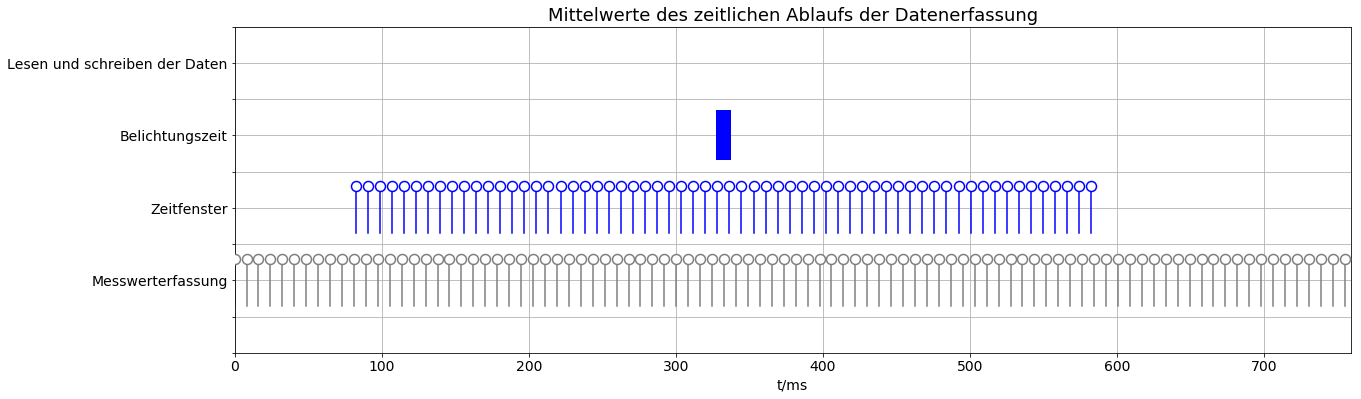

In [87]:
# Plot mit stem Diagrammen
fig, ax = plt.subplots(figsize=(20,6))
i = 0
while i < numberImages:
    if i == 0:
        # Messwerterfassung
        x = np.linspace(startTimeFrameList[i]-meanStartMeasurementDataTime - zeroOffset,meanCaptureImagesTimeList[i] + meanStopMeasurementTime - zeroOffset, 
                        int((meanCaptureImagesTimeList[0] + meanStopMeasurementTime - zeroOffset) / measuredDataPerMs))
        (markers, stemlines, baseline) = plt.stem(x, np.full((x.size), 1.3), linefmt='C7-', basefmt='None', bottom=0.65, markerfmt='wo')
        plt.setp(stemlines, linestyle="-", color="C7", linewidth=1.5)
        plt.setp(markers, markeredgecolor='C7', markersize=10, markeredgewidth=1.5, zorder=3)
        # Zeitfenster
        x = np.linspace(startTimeFrameList[i] - zeroOffset,startTimeFrameList[i]+timeframe - zeroOffset, 
                        int(featuresDf['Anzahl der Messwerte'].mean()))
        (markers, stemlines, baseline) = plt.stem(x, np.full((x.size), 2.3), 'b-', basefmt='None', bottom=1.65, markerfmt='wo')
        plt.setp(stemlines, linestyle="-", color="b", linewidth=1.5)
        plt.setp(markers, markeredgecolor='b', markersize=10, markeredgewidth=1.5, zorder=3)
        # Belichtungszeit
        ax.hlines(xmin=startExposureTimeList[i] - zeroOffset,xmax=exposureTimeList[i] - zeroOffset,y=3, colors="blue", lw=50)
        # Lesen und schreiben der Daten
        ax.hlines(xmin=meanCaptureImagesTimeList[i] - zeroOffset,xmax=meanCaptureImagesTimeList[i] + meanStopMeasurementTime + 10- zeroOffset,
              y=4, colors="dimgrey", lw=50)
    else:
        # Messwerterfassung
        x = np.linspace(startTimeFrameList[i]-meanStartMeasurementDataTime - zeroOffset,meanCaptureImagesTimeList[i] + meanStopMeasurementTime - zeroOffset, 
                        int((meanCaptureImagesTimeList[0] + meanStopMeasurementTime - zeroOffset) / measuredDataPerMs))
        (markers, stemlines, baseline) = plt.stem(x, np.full((x.size), 1.3), linefmt='C7-', basefmt='None', bottom=0.65, markerfmt='wo')
        plt.setp(stemlines, linestyle="-", color="C7", linewidth=1.5)
        plt.setp(markers, markeredgecolor='C7', markersize=10, markeredgewidth=1.5, zorder=3)
    i = i + 1

def formatter(y, pos):
    if y == 1:
        return 'Messwerterfassung'
    if y == 2:
        return 'Zeitfenster'
    if y == 3:
        return 'Belichtungszeit'
    if y == 4:
        return 'Lesen und schreiben der Daten'
    else:
        return ''

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatter))
plt.xlabel('t/ms',fontsize=14)
plt.title('Mittelwerte des zeitlichen Ablaufs der Datenerfassung',fontsize=18)
plt.grid()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlim(0,startTimeFrameList[1]-meanStartMeasurementDataTime - 60)
plt.ylim(0,4.5)
plt.rcParams["legend.fontsize"] = 14

### Diagram mit Min und Max Zeitwerten

In [16]:
# Weise Min und Max Zeitwerte zu Variablen zu
minExposureTime = featuresDf['Belichtungszeit in ns'].min() / 1000000
minExposureTime

10.001839

In [17]:
maxExposureTime = featuresDf['Belichtungszeit in ns'].max() / 1000000
maxExposureTime

29.996324000000001

In [18]:
# Max Zeit vom Stopp der Messwerterfassung zum Ende des Zeitfensters
maxStopMeasurementToEndTimeframeTime =(featuresDf['Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM'] 
                          - (featuresDf['Start des Zeitfensters in ns seit Start der JVM'] + (timeframe * 1000000))).max()
maxStopMeasurementToEndTimeframeTime = maxStopMeasurementToEndTimeframeTime / 1000000
minStopMeasurementToEndTimeframeTime =(featuresDf['Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM'] 
                          - (featuresDf['Start des Zeitfensters in ns seit Start der JVM'] + (timeframe * 1000000))).min()
minStopMeasurementToEndTimeframeTime = minStopMeasurementToEndTimeframeTime / 1000000
maxStopMeasurementToEndTimeframeTime

150.679824

In [19]:
minStopMeasurementToEndTimeframeTime

46.521909000000001

In [20]:
maxStopMeasurementTime = (featuresDf['Zeitstempel in Unixzeit'] - featuresDf['Stopp der Messwerterfassung in Unixzeit']).max()
maxStopMeasurementTime

12

In [21]:
minStopMeasurementTime = (featuresDf['Zeitstempel in Unixzeit'] - featuresDf['Stopp der Messwerterfassung in Unixzeit']).min()

In [22]:
# vom Start der Messwert Datenerfassung bis zum Start des Zeitfensters in ms
maxStartMeasurementDataTime = (featuresDf['Start des Zeitfensters in ns seit Start der JVM'] - featuresDf['Start der Messwerterfassung in ns seit Start der JVM']).max()
maxStartMeasurementDataTime = maxStartMeasurementDataTime / 1000000
minStartMeasurementDataTime = (featuresDf['Start des Zeitfensters in ns seit Start der JVM'] - featuresDf['Start der Messwerterfassung in ns seit Start der JVM']).min()
minStartMeasurementDataTime = minStartMeasurementDataTime / 1000000
minStartMeasurementDataTime

20.405504000000001

In [262]:
# Listen die mit den entsprechenden Vielfachen der Zeitangaben gefüllt werden
maxExposureOffset = (timeframe - maxExposureTime) / 2
minExposureOffset = (timeframe - minExposureTime) / 2
# Abstand zwischen zwei Bildern
meanCaptureImagesTime = meanCaptureImagesTime
# Messwerterfassung
startMaxTimeFrame = meanCaptureImagesTime - maxStopMeasurementToEndTimeframeTime - maxStopMeasurementTime - timeframe
startMinTimeFrame = meanCaptureImagesTime - minStopMeasurementToEndTimeframeTime - minStopMeasurementTime - timeframe
#Zeitfenster
startMaxExposureTime = startMinTimeFrame + maxExposureOffset
startMinExposureTime = startMinTimeFrame + minExposureOffset
# Belichtungszeit
exposureMaxTime = startMaxExposureTime + maxExposureTime
exposureMinTime = startMinExposureTime + minExposureTime

In [263]:
zeroOffsetMinMax = startMaxTimeFrame - maxStartMeasurementDataTime
zeroOffsetMinMax

-40.850121999999999

In [264]:
maxStartMeasurementDataTime

104.170298

In [271]:
maxStopMeasurementTime

12

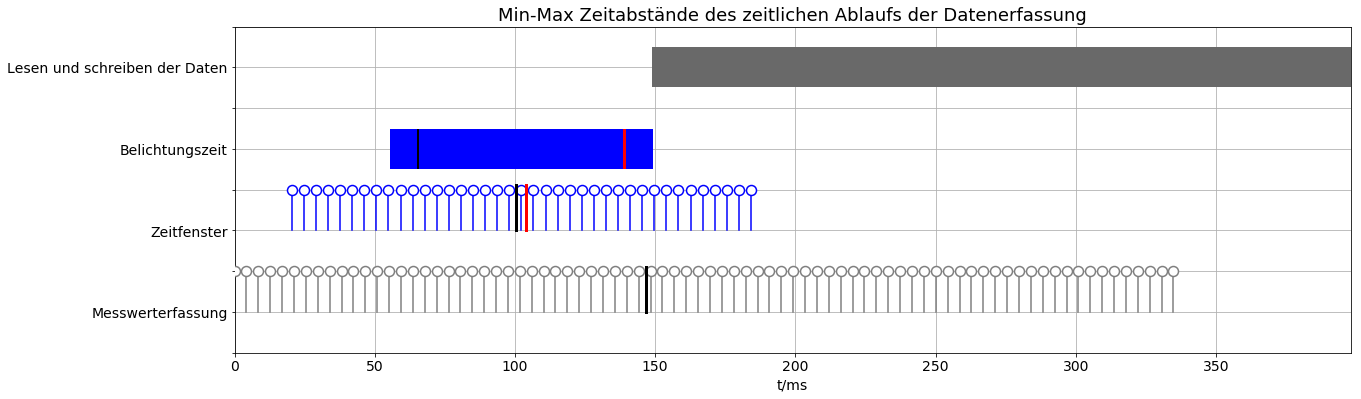

In [286]:
# Plot mit Min und Max Zeitangaben
fig, ax = plt.subplots(figsize=(20,6))
# Messwerterfassung
x = np.linspace(0,maxStartMeasurementDataTime+timeframe+maxStopMeasurementToEndTimeframeTime, 
                        int((maxStartMeasurementDataTime+timeframe+maxStopMeasurementToEndTimeframeTime)/measuredDataPerMs))
(markers, stemlines, baseline) = plt.stem(x, np.full((x.size), 1), linefmt='C7-', basefmt='None', bottom=0.5, markerfmt='wo')
plt.setp(stemlines, linestyle="-", color="C7", linewidth=1.5)
plt.setp(markers, markeredgecolor='C7', markersize=10, markeredgewidth=1.5, zorder=3)
ax.hlines(xmin=minStartMeasurementDataTime + timeframe + minStopMeasurementToEndTimeframeTime - 0.5,
          xmax=minStartMeasurementDataTime + timeframe + minStopMeasurementToEndTimeframeTime + 0.5,
          y=0.77, colors="black", lw=48, zorder=4)
# Zeitfenster
x = np.linspace(minStartMeasurementDataTime,maxStartMeasurementDataTime+timeframe, 
                int((maxStartMeasurementDataTime+timeframe-minStartMeasurementDataTime)/ measuredDataPerMs))
(markers, stemlines, baseline) = plt.stem(x, np.full((x.size), 2), 'b-', basefmt='None', bottom=1.5, markerfmt='wo')
plt.setp(stemlines, linestyle="-", color="b", linewidth=1.5)
plt.setp(markers, markeredgecolor='b', markersize=10, markeredgewidth=1.5, zorder=3)
# Min Start des Zeitfensters
ax.hlines(xmin=minStartMeasurementDataTime+timeframe-0.5,xmax=minStartMeasurementDataTime+timeframe+0.5,y=1.77, colors="black", lw=48, zorder=4)
# Max Start des Zeitfensters
ax.hlines(xmin=maxStartMeasurementDataTime-0.5,xmax=maxStartMeasurementDataTime+0.5,y=1.77, colors="red", lw=48, zorder=4)
# Belichtungszeit
ax.hlines(xmin=minStartMeasurementDataTime + minExposureOffset,xmax=maxStartMeasurementDataTime+timeframe-minExposureOffset,y=2.5, colors="blue", lw=40)
ax.hlines(xmin=minStartMeasurementDataTime + minExposureOffset + minExposureTime-0.5,xmax=minStartMeasurementDataTime + minExposureOffset + minExposureTime + 0.5,y=2.5, colors="black", lw=40)
ax.hlines(xmin=maxStartMeasurementDataTime+timeframe-minExposureOffset-minExposureTime-0.5,xmax=maxStartMeasurementDataTime+timeframe-minExposureOffset-minExposureTime+0.5,y=2.5, colors="red", lw=40)

# Lesen und schreiben der Daten
ax.hlines(xmin=minStartMeasurementDataTime+timeframe+minStopMeasurementToEndTimeframeTime-minStopMeasurementTime,xmax=meanCaptureImagesTime+meanStopMeasurementTime - zeroOffsetMinMax + 50,
                  y=3.5, colors="dimgrey", lw=40)

def formatter(y, pos):
    if y == 0.5:
        return 'Messwerterfassung'
    if y == 1.5:
        return 'Zeitfenster'
    if y == 2.5:
        return 'Belichtungszeit'
    if y == 3.5:
        return 'Lesen und schreiben der Daten'
    else:
        return ''

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatter))
plt.xlabel('t/ms',fontsize=14)
plt.title('Min-Max Zeitabstände des zeitlichen Ablaufs der Datenerfassung',fontsize=18)
plt.grid()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlim(0,startTimeFrameList[1]-meanStartMeasurementDataTime)
plt.ylim(0,4)
plt.rcParams["legend.fontsize"] = 14

In [78]:
(meanCaptureImagesTimeList[0] + maxStopMeasurementToEndTimeframeTime - startMaxTimeFrameList[0]-maxStopMeasurementTime)

381.35964799999999

In [74]:
meanCaptureImagesTimeList[0] + meanStopMeasurementTime - zeroOffset

215.97347183880814

In [77]:
meanCaptureImagesTimeList[0] + meanStopMeasurementTime - startTimeFrameList[0]-meanStartMeasurementDataTime

90.856761651308119